In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [12]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


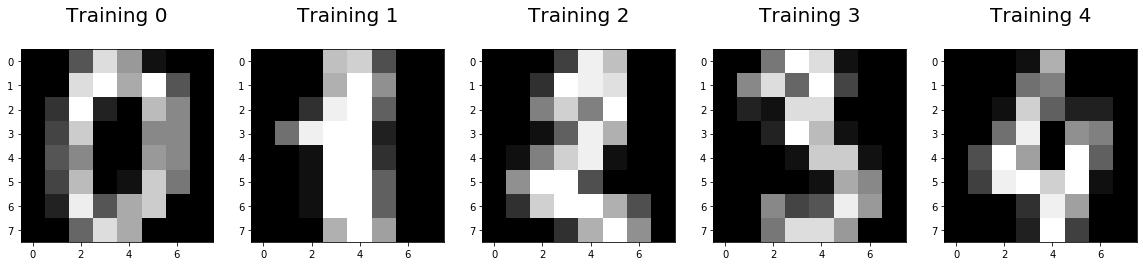

In [14]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index +1)
    plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
    plt.title('Training %i\n' % label, fontsize = 20)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 2)

In [21]:
print(x_train.shape)

(1437, 64)


In [22]:
print(y_train.shape)

(1437,)


In [23]:
print(x_test.shape)

(360, 64)


In [24]:
print(y_test.shape)

(360,)


In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

C:\Users\Debojit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Debojit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(logistic.predict(x_test[0].reshape(1,-1)))

[4]


In [31]:
predictions = logistic.predict(x_test)

In [32]:
score = logistic.score(x_test, y_test)
print(score)

0.9361111111111111


In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  3  2  0]
 [ 0  2  0  0 31  0  0  0  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  1  0  1  3 22]]


Text(0.5, 1, 'Accuracy Score:')

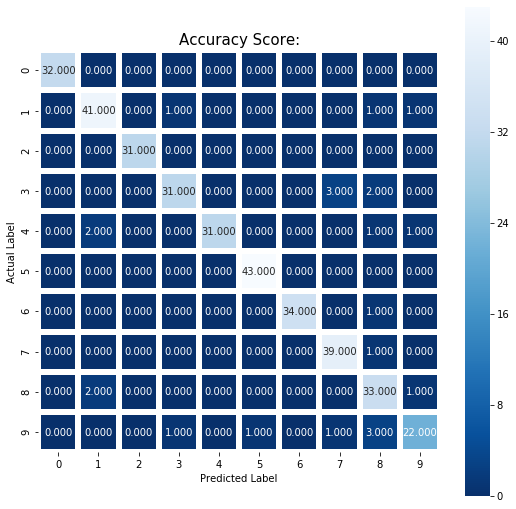

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = 5, square=True, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:'.format(score)
plt.title(all_sample_title, size =  15)

In [ ]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict === actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8) cmap = plt.cm.gray))
    plt.title("predicted: {}, Actual: {}", format(predictions[wrong], y_test[wrong], fontsize=20))